In [1]:
# For local execution (does not require installing the library):
# %load_ext autoreload
# %autoreload 2
# import sys; sys.path.append('../')

# Prettymaps
from prettymaps import *
# Vsketch
import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union



In [2]:
help(plot)

Help on function plot in module prettymaps.draw:

plot(query, backup=None, postprocessing=None, radius=None, layers={'perimeter': {}}, drawing_kwargs={}, osm_credit={}, figsize=(10, 10), ax=None, title=None, vsketch=None, x=None, y=None, scale_x=None, scale_y=None, rotation=None)
    Draw a map from OpenStreetMap data.
    
    Parameters
    ----------
    query : string
        The address to geocode and use as the central point around which to get the geometries
    backup : dict
        (Optional) feed the output from a previous 'plot()' run to save time
    postprocessing: function
        (Optional) Apply a postprocessing step to the 'layers' dict
    radius
        (Optional) If not None, draw the map centered around the address with this radius (in meters)
    layers: dict
        Specify the name of each layer and the OpenStreetMap tags to fetch
    drawing_kwargs: dict
        Drawing params for each layer (matplotlib params such as 'fc', 'ec', 'fill', etc.)
    osm_credit: d

/home/ivan/miniconda3/envs/prettymaps/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/ivan/miniconda3/envs/prettymaps/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/home/ivan/miniconda3/envs/prettymaps/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/home/ivan/miniconda3/envs/prettymaps/lib/python3.9/site-packa

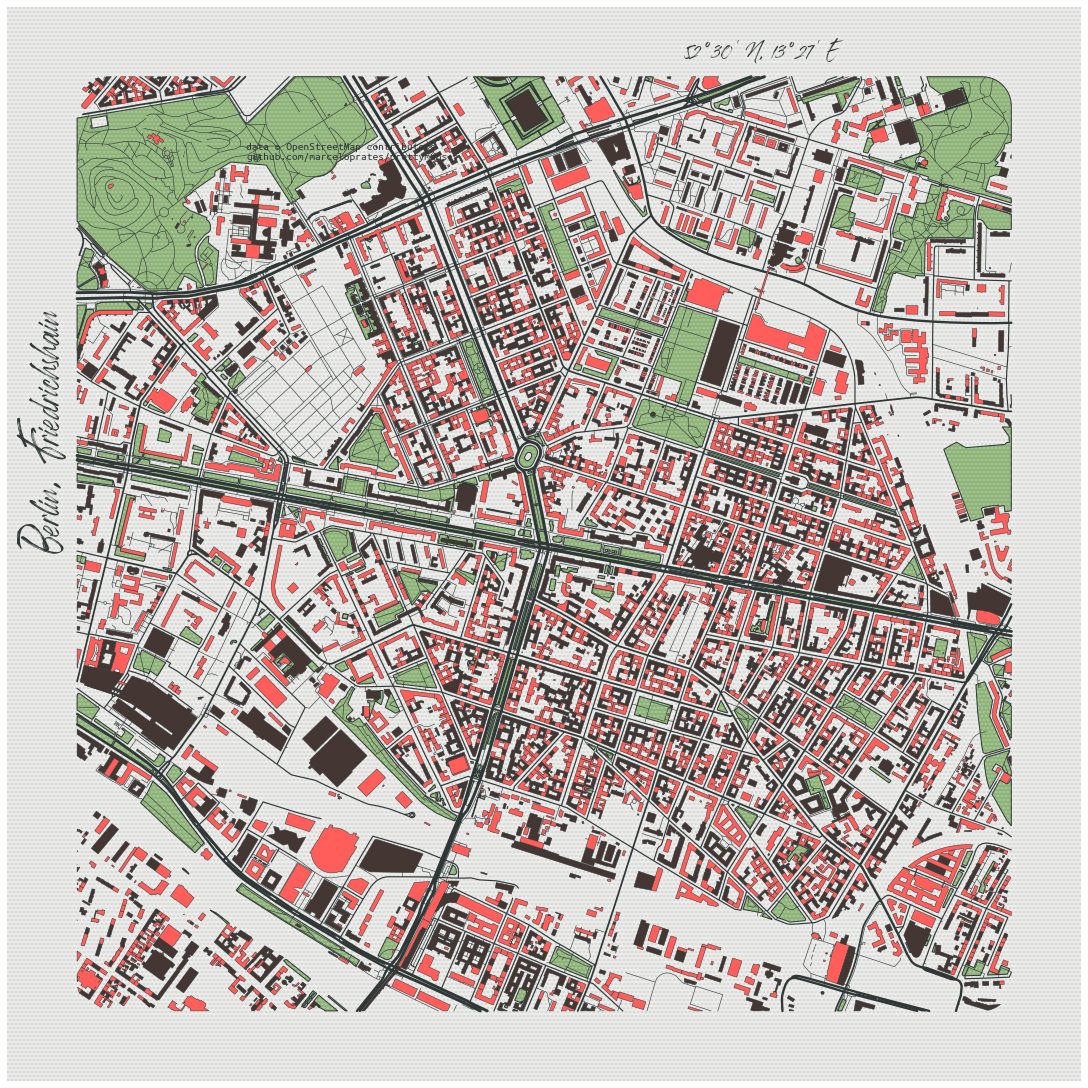

In [5]:
# Style parameters
palette = ['#433633', '#FF5E5B']
background_c = '#bcbcbc'
dilate = 100

# Setup figure
fig, ax = plt.subplots(figsize = (15, 15), constrained_layout = True)

# Plot
layers = plot(
    (52.5158709, 13.4540123), radius = 1500,
    ax = ax,
    layers = {
        'perimeter': {'circle': False, 'dilate': dilate},
        'streets': {
            'width': {
                'primary': 5,
                'secondary': 4,
                'tertiary': 3,
                'residential': 2,
                'footway': 1,
            },
            'circle': False,
            'dilate': dilate
        },
        'building': {
            'tags': {'building': True},
            'union': False,
            'circle': False,
            'dilate': dilate
        },
        'green': {
            'tags': {
                'landuse': ['grass', 'village_green'],
                'leisure': 'park'
            },
            'circle': False,
            'dilate': dilate
        },
    },
    drawing_kwargs = {
        'background': {'fc': '#efefef', 'ec': '#d7d8d4', 'hatch': 'ooo...', 'zorder': -1},
        'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
        'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
        'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
        'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
        'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
    },
    osm_credit = {'x': 0.2, 'y': 0.1, 'color': '#2F3737'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin-.06*dx, xmax+.06*dx)
ax.set_ylim(ymin-.06*dy, ymax+.06*dy)

# Draw left text
ax.text(
    xmin-.06*dx, ymin+.5*dy,
    'Berlin, Friedrichshain',
    color = '#2F3737',
    rotation = 90,
    fontproperties = fm.FontProperties(fname = './fonts/FontsFree-Net-Roughmarker.ttf', size = 35),
)
# Draw top text
ax.text(
    xmax-.35*dx, ymax+.02*dy,
    "52° 30' N, 13° 27' E",
    color = '#2F3737',
    fontproperties = fm.FontProperties(fname = './fonts/FontsFree-Net-Roughmarker.ttf', size = 18),
)

plt.savefig('./prints/Berlin-Fhain.png')
plt.savefig('./prints/Berlin-Fhain.svg')